In [287]:
import pandas as pd
import numpy as np

In [326]:
import matplotlib.pyplot as plt
%matplotlib inline

Below function reads data,renames rows and indexes dataframe by Country_Name

In [312]:
def load_data(file):
    df1 = pd.read_csv(file,index_col=0,skiprows=1)
    df = pd.DataFrame(df1)
    df.columns = [ 'Summer', 'Gold_sum', 'Silver_sum', 'Bronze_sum', 'Total_sum', 'Winter',
       'Gold_win', 'Silver_win', 'Bronze_win', 'Total_win', 'Games', 'Gold_tot', 'Silver_tot',
       'Bronze_tot', 'Combined total']
    df.drop("Totals" ,axis=0 ,inplace=True)
    df['split'] = df.index.str.split("\s\(")
    df['country_code'] = df['split'].str[1].str[:3]
    df['country_name'] = df['split'].str[0]
    df.set_index('country_name',inplace=True)
    return df

    

In [289]:
DF = load_data("C:\\Users\\shubham\\Desktop\\personal\\ml_intern-master\\olympics-mini-project\\data\\olympics.csv")

In [315]:
DF.head()

,Summer,Gold_sum,Silver_sum,Bronze_sum,Total_sum,Winter,Gold_win,Silver_win,Bronze_win,Total_win,Games,Gold_tot,Silver_tot,Bronze_tot,Combined total,split,country_code
country_name,,,,,,,,,,,,,,,,,
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,"[Afghanistan, AFG)]",AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,"[Algeria, ALG)]",ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,"[Argentina, ARG)]",ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,"[Armenia, ARM)]",ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,"[Australasia, ANZ) [ANZ]]",ANZ


Below function returns first country details.

In [317]:
def first_country(df):
    return df.iloc[0]

In [318]:
first_country(DF)

Summer                             13
Gold_sum                            0
Silver_sum                          0
Bronze_sum                          2
Total_sum                           2
Winter                              0
Gold_win                            0
Silver_win                          0
Bronze_win                          0
Total_win                           0
Games                              13
Gold_tot                            0
Silver_tot                          0
Bronze_tot                          2
Combined total                      2
split             [Afghanistan, AFG)]
country_code                      AFG
Name: Afghanistan, dtype: object

Below function returns country which has maximum gold medals.

In [303]:
def gold_medal(df):
    return DF['Gold_sum'].argmax(0)
    

In [304]:
gold_medal(DF)

'United States'

Below function returns country which has the biggest difference in gold medal counts.

In [305]:
def biggest_difference_in_gold_medal(df):
    return (DF.Gold_sum - DF.Gold_win).abs().argmax()

In [306]:
biggest_difference_in_gold_medal(DF)

'United States'

Below function returns Points table alogwith respective country name.

In [307]:
def get_points(df):
    points = np.zeros(len(DF))
    points += DF.Gold_tot * 3
    points += DF.Silver_tot * 2
    points += DF.Bronze_tot * 1
    return pd.Series(points, index=DF.index)

In [308]:
points=get_points(DF)

In [309]:
print(points)


country_name
Afghanistan                            2.0
Algeria                               27.0
Argentina                            130.0
Armenia                               16.0
Australasia                           22.0
Australia                            923.0
Austria                              569.0
Azerbaijan                            43.0
Bahamas                               24.0
Bahrain                                1.0
Barbados                               1.0
Belarus                              154.0
Belgium                              276.0
Bermuda                                1.0
Bohemia                                5.0
Botswana                               2.0
Brazil                               184.0
British West Indies                    2.0
Bulgaria                             411.0
Burundi                                3.0
Cameroon                              12.0
Canada                               846.0
Chile                                 24.

In [310]:
DF1 = DF.copy()
DF1.drop("split",axis=1,inplace=True)
DF1.drop("country_code",axis=1,inplace=True)

Below function returns Elbow curve to check optimum K value.
By looking at graph, it suggests K value near 3 and we also have 3 types medals where we can distribute data.


In [311]:
from sklearn.cluster import KMeans

In [358]:
def k_means(df):
    distorsions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), distorsions)
    plt.grid(True) 
    plt.title('Elbow curve')

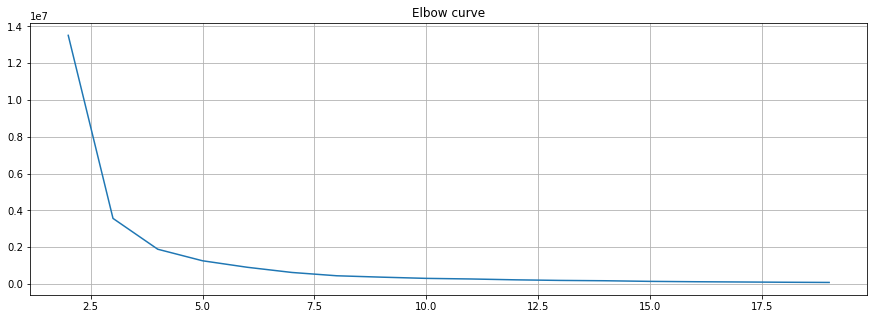

In [359]:
k_means(DF1)

Following array gives cluster centres

In [346]:
kmeans = KMeans(n_clusters=3)

In [347]:
kmeans.fit(DF1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [348]:
kmeans.cluster_centers_

array([[  1.22160000e+01,   7.92000000e+00,   9.80800000e+00,
          1.13520000e+01,   2.90800000e+01,   4.67200000e+00,
          9.84000000e-01,   1.28800000e+00,   1.36800000e+00,
          3.64000000e+00,   1.68880000e+01,   8.90400000e+00,
          1.10960000e+01,   1.27200000e+01,   3.27200000e+01],
       [  2.00500000e+01,   1.42150000e+02,   1.39600000e+02,
          1.52250000e+02,   4.34000000e+02,   1.78500000e+01,
          3.70000000e+01,   3.47500000e+01,   3.46500000e+01,
          1.06400000e+02,   3.79000000e+01,   1.79150000e+02,
          1.74350000e+02,   1.86900000e+02,   5.40400000e+02],
       [  2.60000000e+01,   9.76000000e+02,   7.57000000e+02,
          6.66000000e+02,   2.39900000e+03,   2.20000000e+01,
          9.60000000e+01,   1.02000000e+02,   8.40000000e+01,
          2.82000000e+02,   4.80000000e+01,   1.07200000e+03,
          8.59000000e+02,   7.50000000e+02,   2.68100000e+03]])